## Import Drive from Google Colab

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_directory = '/content/drive/MyDrive/Python'

In [3]:
!ls

drive  sample_data


## Import All Necessary Libaries to Give to the Dataset

In [4]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Importing the BTOA Traffic 2023.xlsx Dataset

In [5]:
df = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name='AMB',header=8)

# DESCRIPTIVE ANALYSIS OF THE DATA

In [6]:
# Generate descriptive statistics
desc = df.info() 

# Print the descriptive statistics                                 
print(desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    126 non-null    float64
 1   Vehicle Classification  126 non-null    object 
 2                           0 non-null      float64
 3   JANUARY                 126 non-null    float64
 4   FEBRUARY                123 non-null    float64
 5   MARCH                   123 non-null    float64
 6   APRIL                   123 non-null    float64
 7   MAY                     123 non-null    float64
 8   JUNE                    123 non-null    float64
 9   JULY                    123 non-null    float64
 10  AUGUST                  123 non-null    float64
 11  SEPTEMBER               123 non-null    float64
 12  OCTOBER                 123 non-null    float64
 13  NOVEMBER                123 non-null    float64
 14  DECEMBER                123 non-null    fl

# **Data Cleaning | Data Transformation**

# MANIPULATING DATA TO ONLY SELECT THE REQUIRED DATA FRAME FROM THE FILE

In [7]:
def import_file_create_df(sheet_name):
  import pandas as pd
  df = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name=sheet_name,header=8)
  df = df.iloc[:90, 0:16]
  df = df.dropna(axis=0,how='all')
  df = df.dropna(axis=1,how='all')
  # df = df.reset_index(inplace=True)
  df = df.set_index('Year')
  df.index = df.index.astype(int)
  df_dict = {sheet_name: df}
  return df_dict
  
bridge_name_short = ['AMB','DWT','OGB','PB','IBA','SIBC','TIBA','LQB','RBW','WPB'] 


bridge_data = [import_file_create_df(name) for name in bridge_name_short]

#bridge_data_dict = {name: import_file_create_df(name) for name in bridge_name_short}


In [8]:
#Calling the PB dataframe to check if the data is imported successfuly  

bridge_data[3]['PB']


,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,Passenger Cars,368663.0,344671.0,437544.0,433902.0,475776.0,504830.0,662850.0,652150.0,472062.0,413997.0,391854.0,385420.0,5543719.0
2006,Trucks,107437.0,103445.0,118803.0,104740.0,116765.0,114739.0,100335.0,116220.0,106703.0,106697.0,109395.0,96071.0,1301350.0
2006,Buses & Misc.,2282.0,2254.0,2516.0,2522.0,2688.0,2578.0,2680.0,2900.0,2620.0,2808.0,2994.0,2198.0,31040.0
2006,TOTAL,478382.0,450370.0,558863.0,541164.0,595229.0,622147.0,765865.0,771270.0,581385.0,523502.0,504243.0,483689.0,6876109.0
2007,Passenger Cars,331372.0,295402.0,395639.0,375143.0,430733.0,495246.0,611194.0,637918.0,469980.0,459825.0,422178.0,369142.0,5293772.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,TOTAL,147323.0,147188.0,214697.0,261535.0,284167.0,307804.0,364697.0,376581.0,326329.0,342568.0,283481.0,255753.0,3312123.0
2023,Passenger Cars,199101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199101.0
2023,Trucks,86124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86124.0


# CALLING ALL THE DATA FRAMES TO CHECK IF THEY ARE RUNNING PROPERLY OR NOT

In [9]:
bridge_name_short = ['AMB','DWT','OGB','PB','IBA','SIBC','TIBA','LQB','RBW','WPB'] 


In [10]:
#Imported each dataset into the specific variables to identify them with bridge name

for bridge in bridge_data:
  for key, value in bridge.items():
    if key == 'AMB':
      AMB = value
    elif key == 'DWT':
      DWT = value
    elif key == 'OGB':
      OGB = value
    elif key == 'PB':
      PB = value
    elif key == 'IBA':
      IBA = value
    elif key == 'PB':
      PB = value
    elif key == 'SIBC':
      SIBC = value
    elif key == 'TIBA':
      TIBA = value
    elif key == 'LQB':
      LQB = value
    elif key == 'RBW':
      RBW = value
    elif key == 'PB':
      PB = value
    elif key == 'WPB':
      WPB = value                                                
    else:
      print("Not Found")
     

# **Analyzing the Data for the Years 2012 and 2022**

In [11]:
Annual = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name='Annual',header=62)

In [12]:
Annual.head()

,Unnamed: 0,Crossings,,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Ambassador Bridge,NaN,9680232.0,9082435.0,7349305.0,6494620.0,7232366.0,7252916.0,7310302.0,...,7162182.0,6929199.0,6750091.0,6875030.0,7238514.0,6975467.0,4110302.0,4117384.0,4803288.0,445052.0
2,NaN,Blue Water Bridge,NaN,5331751.0,5046700.0,4921954.0,4480873.0,4747027.0,5120079.0,5258364.0,...,5355664.0,4791968.0,4672578.0,4629527.0,4696264.0,4546442.0,2005542.0,2022035.0,3185083.0,257230.0
3,NaN,Detroit-Windsor Tunnel,NaN,5457164.0,4898425.0,4762722.0,4002110.0,3611682.0,3789769.0,3974839.0,...,3907393.0,4181126.0,4390058.0,4267954.0,3871713.0,4219917.0,1373177.0,1067809.0,2970372.0,274214.0
4,NaN,Ogdensburg Bridge,NaN,510804.0,552596.0,554239.0,555586.0,624378.0,711777.0,784464.0,...,780603.0,632905.0,623971.0,679943.0,674548.0,666558.0,220557.0,183402.0,387773.0,33503.0


In [35]:
Annual = Annual.dropna(axis=0,how='all')
Annual = Annual.dropna(axis=1,how='all')
Annual = Annual.drop(13)
Annual = Annual.drop('2023 (YTD)', axis=1)
#Annual = Annual.transpose().loc['Total Crossings']
Annual.head()

,Crossings,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Ambassador Bridge,9680232.0,9082435.0,7349305.0,6494620.0,7232366.0,7252916.0,7310302.0,7246608.0,7162182.0,6929199.0,6750091.0,6875030.0,7238514.0,6975467.0,4110302.0,4117384.0,4803288.0
2,Blue Water Bridge,5331751.0,5046700.0,4921954.0,4480873.0,4747027.0,5120079.0,5258364.0,5405208.0,5355664.0,4791968.0,4672578.0,4629527.0,4696264.0,4546442.0,2005542.0,2022035.0,3185083.0
3,Detroit-Windsor Tunnel,5457164.0,4898425.0,4762722.0,4002110.0,3611682.0,3789769.0,3974839.0,3980194.0,3907393.0,4181126.0,4390058.0,4267954.0,3871713.0,4219917.0,1373177.0,1067809.0,2970372.0
4,Ogdensburg Bridge,510804.0,552596.0,554239.0,555586.0,624378.0,711777.0,784464.0,836803.0,780603.0,632905.0,623971.0,679943.0,674548.0,666558.0,220557.0,183402.0,387773.0
5,Peace Bridge,6876109.0,6635881.0,6351818.0,5908235.0,6017725.0,6056998.0,6042618.0,5927886.0,5617983.0,5410247.0,5333910.0,5304528.0,5270645.0,5116168.0,1898457.0,1794056.0,3312123.0


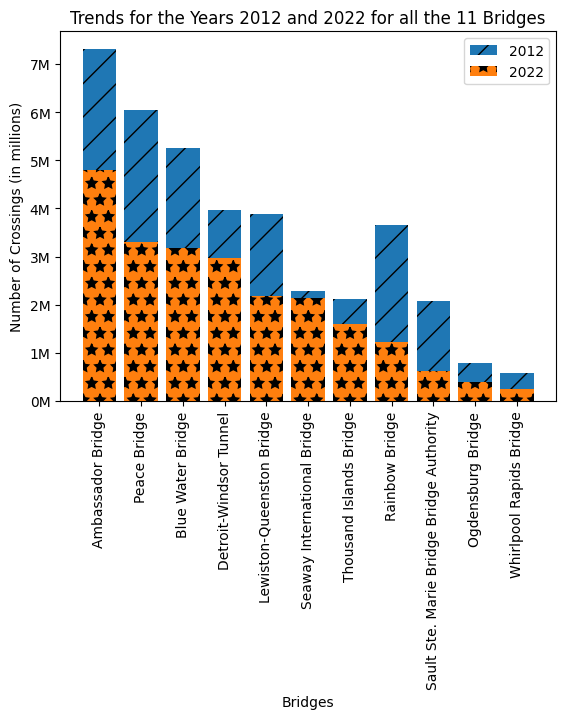

In [36]:
import warnings
warnings.filterwarnings('ignore')

# sort Annual by the total number of crossings in 2022
Annual_sorted = Annual.sort_values(2022, ascending=False)

fig, ax = plt.subplots()

# divide y-axis values by 1,000,000 to convert to millions
y_2012 = Annual_sorted[2012]/1000000
y_2022 = Annual_sorted[2022]/1000000

# create the first bar plot and set labels
ax.bar(Annual_sorted['Crossings'], y_2012, hatch='/', label='2012')
# create the second bar plot and set labels
ax.bar(Annual_sorted['Crossings'], y_2022, hatch='*', label='2022')

plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}M'.format(y) for y in ax.get_yticks()])

# Set the  label
ax.set_xlabel('Bridges')

ax.set_ylabel('Number of Crossings (in millions)')

ax.set_title('Trends for the Years 2012 and 2022 for all the 11 Bridges')

# add legend
ax.legend()

plt.show()


The output graph shows a comparison between the number of crossings for each of the 11 bridges in the years 2012 and 2022. The data is presented as a bar chart with two bars for each bridge, one for 2012 and one for 2022. The y-axis represents the number of crossings in millions, and the x-axis shows the name of the 11 bridges.

From the graph, it can be observed that for most of the bridges, the number of crossings has decreased between 2012 and 2022.The busiest bridge in 2022 was the Ambassador Bridge, followed by the Peace Bridge. From the graph we could see there is approximately 35% in the movement of vehicles between both the countries

# **Analyzed the Top 2 and Bottom 2 Bridges**

# Top 2 Bridges

In [43]:
filter = AMB['Vehicle Classification'] == 'TOTAL'
Top1 = AMB[filter]
Top1

,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,TOTAL,788142.0,742686.0,866957.0,804144.0,851316.0,827614.0,781360.0,865957.0,800361.0,808847.0,805827.0,737021.0,9680232.0
2007,TOTAL,788910.0,689749.0,822697.0,768663.0,803086.0,775068.0,754534.0,835962.0,738811.0,766990.0,716787.0,621178.0,9082435.0
2008,TOTAL,648920.0,609029.0,627406.0,637608.0,650291.0,637553.0,615238.0,668853.0,595501.0,604827.0,552999.0,501080.0,7349305.0
2009,TOTAL,461198.0,474288.0,561287.0,539344.0,538847.0,506176.0,546235.0,603001.0,583343.0,592985.0,548593.0,539323.0,6494620.0
2010,TOTAL,522477.0,515189.0,626299.0,610209.0,626151.0,631267.0,622200.0,669930.0,619575.0,631696.0,584589.0,572784.0,7232366.0
2011,TOTAL,559338.0,520111.0,646035.0,598846.0,617927.0,622718.0,609466.0,661194.0,604045.0,626503.0,602435.0,584298.0,7252916.0
2012,TOTAL,574677.0,570838.0,649680.0,620204.0,636692.0,626157.0,594763.0,666329.0,593658.0,630631.0,599266.0,547407.0,7310302.0
2013,TOTAL,560495.0,535548.0,619307.0,609045.0,632741.0,619814.0,612230.0,672506.0,601483.0,636608.0,588718.0,558113.0,7246608.0
2014,TOTAL,541284.0,516464.0,605719.0,593528.0,620464.0,618510.0,621742.0,650005.0,598710.0,638914.0,581700.0,575142.0,7162182.0


In [44]:
filter = PB['Vehicle Classification'] == 'TOTAL'
Top2 = PB[filter]
Top2

,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,TOTAL,478382.0,450370.0,558863.0,541164.0,595229.0,622147.0,765865.0,771270.0,581385.0,523502.0,504243.0,483689.0,6876109.0
2007,TOTAL,442794.0,399878.0,514923.0,487003.0,551640.0,607687.0,719046.0,754387.0,576681.0,583581.0,534856.0,463405.0,6635881.0
2008,TOTAL,437468.0,424272.0,515223.0,477803.0,547908.0,569198.0,689138.0,738766.0,536570.0,531097.0,462987.0,421388.0,6351818.0
2009,TOTAL,382563.0,389219.0,470938.0,452831.0,514337.0,491356.0,620669.0,663759.0,524724.0,496619.0,460221.0,440999.0,5908235.0
2010,TOTAL,389793.0,367419.0,485880.0,471049.0,503810.0,520547.0,645546.0,673398.0,521303.0,513804.0,475513.0,449663.0,6017725.0
2011,TOTAL,399221.0,382373.0,471083.0,472577.0,506315.0,536225.0,653883.0,662904.0,529837.0,503352.0,472861.0,466367.0,6056998.0
2012,TOTAL,404270.0,411065.0,492685.0,471177.0,507289.0,542002.0,637564.0,672264.0,509037.0,492970.0,459592.0,442703.0,6042618.0
2013,TOTAL,402904.0,387214.0,483169.0,462217.0,511321.0,528246.0,623861.0,652527.0,500515.0,495660.0,452039.0,428213.0,5927886.0
2014,TOTAL,370733.0,365579.0,442956.0,443121.0,487289.0,513223.0,595916.0,634018.0,479533.0,485092.0,380554.0,419969.0,5617983.0


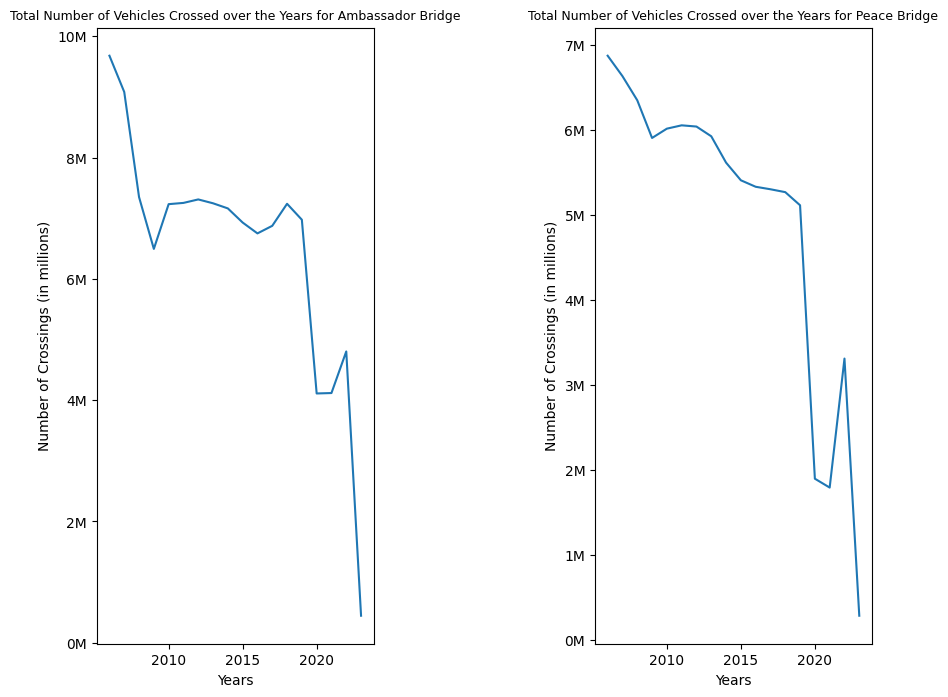

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# create the first line plot
sns.lineplot(data=Top1, x='Year', y='TOTAL', ax=ax1)

# format the y-axis tick labels as millions
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x/1000000))
ax1.yaxis.set_major_formatter(formatter1)

# set the y-axis label
ax1.set_ylabel('Number of Crossings (in millions)')
ax1.set_title('Total Number of Vehicles Crossed over the Years for Ambassador Bridge',fontsize = 9)

# create the second line plot
sns.lineplot(data=Top2, x='Year', y='TOTAL', ax=ax2)

# format the y-axis tick labels as millions
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x/1000000))
ax2.yaxis.set_major_formatter(formatter2)

# set the y-axis label
ax2.set_ylabel('Number of Crossings (in millions)')
ax2.set_title('Total Number of Vehicles Crossed over the Years for Peace Bridge',fontsize = 9)

# set the x-axis label for both subplots
for ax in (ax1, ax2):
    ax.set_xlabel('Years')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.8)

# display the plot
plt.show()


Conclusion:
The graph has two subplots,each showing a line plot of the total number of vehicles crossed over the years for top two different bridges.

The first subplot shows the data for the Ambassador Bridge, with the x-axis representing the years and the y-axis representing the total number of crossings in millions. The line plot shows a gradual decrease in the number of crossings over time, with a peak around the start and a decline thereafter.
The second subplot shows the data for the Peace Bridge, with a similar axis and label format as the first subplot. The line plot shows a fluctuating trend over time, with some years showing an increase in crossings and others showing a decreaseThere is no clear pattern of increase or decrease over time for the Peace Bridge.

# ***Bottom*** 2 Bridges

In [46]:
filter = OGB['Vehicle Classification'] == 'TOTAL'
Bottom2 = OGB[filter]
Bottom2

,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,TOTAL,32917.0,32017.0,38030.0,38791.0,44045.0,46185.0,53792.0,54230.0,45474.0,43390.0,44536.0,37397.0,510804.0
2007,TOTAL,32467.0,31182.0,36099.0,38040.0,43571.0,48496.0,57298.0,60272.0,52851.0,54318.0,56430.0,41572.0,552596.0
2008,TOTAL,36584.0,35997.0,40425.0,44087.0,51871.0,50268.0,59243.0,62825.0,49077.0,47243.0,40918.0,35701.0,554239.0
2009,TOTAL,30737.0,31312.0,35479.0,38082.0,45527.0,66268.0,67005.0,57377.0,48544.0,48189.0,46297.0,40769.0,555586.0
2010,TOTAL,35229.0,34504.0,44317.0,47623.0,53659.0,54413.0,70109.0,67874.0,55938.0,56535.0,52619.0,51558.0,624378.0
2011,TOTAL,42331.0,40756.0,49524.0,56555.0,60831.0,64035.0,78496.0,77981.0,64522.0,61181.0,57183.0,58226.0,711621.0
2012,TOTAL,42434.0,46567.0,57273.0,58861.0,66628.0,70871.0,80465.0,88404.0,72279.0,67295.0,68844.0,64543.0,784464.0
2013,TOTAL,53764.0,51324.0,64249.0,67051.0,73771.0,75142.0,83117.0,91602.0,73100.0,71209.0,68048.0,64426.0,836803.0
2014,TOTAL,51418.0,46602.0,58349.0,60339.0,70772.0,71766.0,81053.0,86040.0,66234.0,65838.0,60923.0,61269.0,780603.0


In [47]:
filter = WPB['Vehicle Classification'] == 'TOTAL'
Bottom1 = WPB[filter]
Bottom1

,Vehicle Classification,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
Year,,,,,,,,,,,,,,
2006,TOTAL,13128.0,12037.0,14169.0,14432.0,16100.0,16555.0,19773.0,21386.0,17562.0,17752.0,17257.0,17087.0,197238.0
2007,TOTAL,17152.0,14065.0,16410.0,17322.0,20776.0,21574.0,25362.0,29371.0,24017.0,26843.0,25706.0,21575.0,260173.0
2008,TOTAL,20274.0,18952.0,20607.0,22298.0,25165.0,25474.0,29576.0,33325.0,28515.0,28490.0,23633.0,21155.0,297464.0
2009,TOTAL,19709.0,19870.0,22257.0,24087.0,27464.0,26075.0,30343.0,33233.0,31048.0,30354.0,28395.0,27127.0,319962.0
2010,TOTAL,22918.0,22017.0,26865.0,29396.0,32044.0,30716.0,38849.0,39439.0,33801.0,33755.0,32639.0,32586.0,375025.0
2011,TOTAL,27084.0,25648.0,31740.0,36398.0,40769.0,41562.0,49667.0,50577.0,46371.0,43530.0,40615.0,42324.0,476285.0
2012,TOTAL,34382.0,35313.0,41623.0,44435.0,48193.0,50417.0,59253.0,61685.0,52326.0,52642.0,50646.0,52590.0,583505.0
2013,TOTAL,45686.0,42948.0,55345.0,56468.0,65476.0,67219.0,75133.0,82590.0,67953.0,66354.0,62021.0,63794.0,750987.0
2014,TOTAL,49327.0,46740.0,54923.0,62426.0,67244.0,71927.0,78361.0,84311.0,33324.0,52294.0,50958.0,54855.0,706690.0


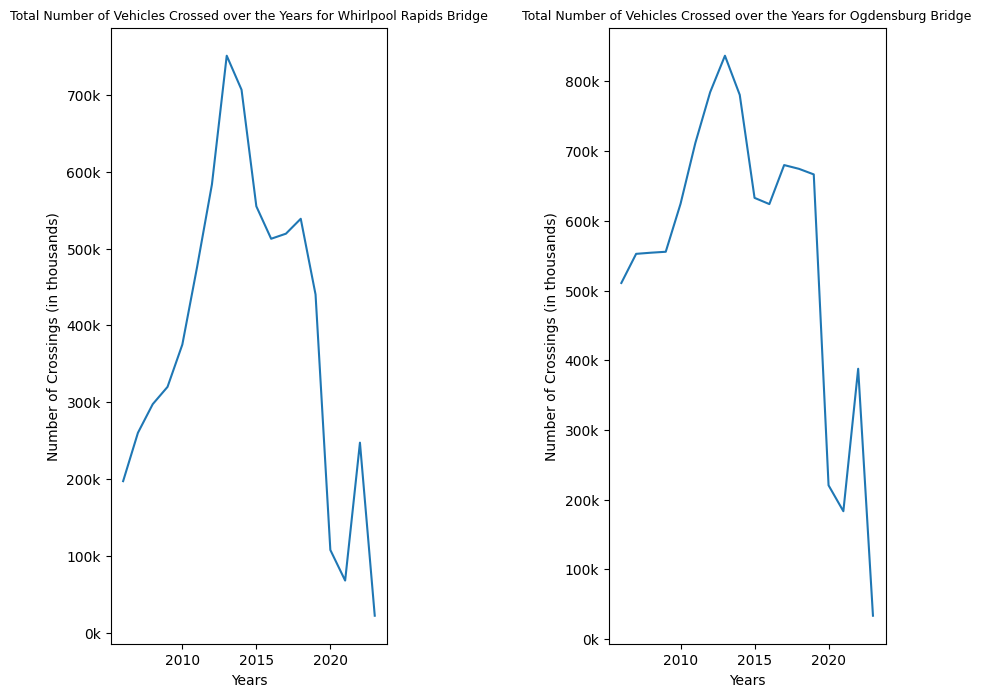

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

# create the first line plot
sns.lineplot(data=Bottom1, x='Year', y='TOTAL', ax=ax1)

# format the y-axis tick labels as thousands
formatter1 = ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000))
ax1.yaxis.set_major_formatter(formatter1)

# set the y-axis label
ax1.set_ylabel('Number of Crossings (in thousands)')
ax1.set_title('Total Number of Vehicles Crossed over the Years for Whirlpool Rapids Bridge',fontsize = 9)

# create the second line plot
sns.lineplot(data=Bottom2, x='Year', y='TOTAL', ax=ax2)

# format the y-axis tick labels as thousands
formatter2 = ticker.FuncFormatter(lambda x, pos: '{:.0f}k'.format(x/1000))
ax2.yaxis.set_major_formatter(formatter2)

# set the y-axis label
ax2.set_ylabel('Number of Crossings (in thousands)')
ax2.set_title('Total Number of Vehicles Crossed over the Years for Ogdensburg Bridge',fontsize = 9)

# set the x-axis label for both subplots
for ax in (ax1, ax2):
    ax.set_xlabel('Years')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.8)

# display the plot
plt.show()


The graph has two subplots, each showing a line plot of the total number of vehicles crossed over the years for bottom two different bridges.

Both the subplot shows the data for Whirlpool Rapids Bridge and  Peace Bridge, X-axis represents the years where as the Y-axis represents the number of crossings in thousands . The line plot shows a fluctuating trend over time, with some years showing an increase in crossings and others showing a decrease. There is no clear pattern of increase or decrease over time for the Peace Bridge.

# **Analysing the trend for different Category of Vehicles for last 5 Years**

# For Passenger Cars

In [21]:
Annual_PassengersCars  = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name='Annual',header=8)

In [22]:
Annual_PassengersCars = Annual_PassengersCars.dropna(axis=0,how='all')
Annual_PassengersCars = Annual_PassengersCars.dropna(axis=1,how='all')
Annual_PassengersCars.head()

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,6113114,5649619.0,4447793.0,4187568.0,4536678.0,4625799.0,4800491.0,4895539.0,4691983.0,4466494.0,4203114.0,4327377.0,4645011.0,4423950.0,1856008.0,1813664.0,2500296.0,241491
2,Blue Water Bridge,NaN,3686528,3424048.0,3339644.0,3130384.0,3310247.0,3664756.0,3774216.0,3861547.0,3762632.0,3182379.0,2986955.0,2975965.0,3036666.0,2944860.0,564256.0,363024.0,1455634.0,127553
3,Detroit-Windsor Tunnel,NaN,5269959,4732981.0,4616730.0,3891479.0,3504517.0,3696635.0,3890340.0,3906587.0,3834421.0,4107345.0,4311179.0,4187071.0,3820748.0,4177293.0,1354451.0,1046270.0,2947447.0,271687
4,Ogdensburg Bridge,NaN,414364,464793.0,477577.0,483674.0,554291.0,639233.0,713704.0,764391.0,704164.0,556847.0,547525.0,594515.0,593616.0,591772.0,151292.0,109980.0,318863.0,27850
5,Peace Bridge,NaN,5543719,5293772.0,5035811.0,4762781.0,4768254.0,4772064.0,4747023.0,4653634.0,4340338.0,4155935.0,4097484.0,4116994.0,4112579.0,4021927.0,876229.0,682366.0,2232200.0,199101


In [23]:
Annual_PassengersCars = Annual_PassengersCars.iloc[:11, 0:24]
Annual_PassengersCars

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,6113114,5649619.0,4447793.0,4187568.0,4536678.0,4625799.0,4800491.0,4895539.0,4691983.0,4466494.0,4203114.0,4327377.0,4645011.0,4423950.0,1856008.0,1813664.0,2500296.0,241491
2,Blue Water Bridge,NaN,3686528,3424048.0,3339644.0,3130384.0,3310247.0,3664756.0,3774216.0,3861547.0,3762632.0,3182379.0,2986955.0,2975965.0,3036666.0,2944860.0,564256.0,363024.0,1455634.0,127553
3,Detroit-Windsor Tunnel,NaN,5269959,4732981.0,4616730.0,3891479.0,3504517.0,3696635.0,3890340.0,3906587.0,3834421.0,4107345.0,4311179.0,4187071.0,3820748.0,4177293.0,1354451.0,1046270.0,2947447.0,271687
4,Ogdensburg Bridge,NaN,414364,464793.0,477577.0,483674.0,554291.0,639233.0,713704.0,764391.0,704164.0,556847.0,547525.0,594515.0,593616.0,591772.0,151292.0,109980.0,318863.0,27850
5,Peace Bridge,NaN,5543719,5293772.0,5035811.0,4762781.0,4768254.0,4772064.0,4747023.0,4653634.0,4340338.0,4155935.0,4097484.0,4116994.0,4112579.0,4021927.0,876229.0,682366.0,2232200.0,199101
6,Sault Ste. Marie Bridge Bridge Authority,NaN,1731325,1752030.0,1746298.0,1534785.0,1682705.0,1856329.0,1928702.0,1963716.0,1842417.0,1439328.0,1297538.0,1278238.0,1309924.0,1217958.0,255681.0,111387.0,534325.0,49756
7,Seaway International Bridge,NaN,2432589,2476513.0,2468507.0,1743363.0,2194423.0,2296704.0,2199454.0,2153991.0,2254166.0,2202158.0,2212833.0,2309597.0,2302539.0,2349169.0,1697256.0,1755682.0,2073530.0,168188
8,Thousand Islands Bridge,NaN,1620709,1708234.0,1666416.0,1640511.0,1717938.0,1713526.0,1754828.0,1749272.0,1696888.0,1614794.0,1605192.0,1602414.0,1580041.0,1663274.0,705362.0,688364.0,1201983.0,72410
9,Lewiston-Queenston Bridge,NaN,3124068,3080352.0,2875114.0,2612951.0,2715081.0,3091934.0,3178793.0,2902182.0,2742473.0,2462193.0,2416322.0,2505198.0,2601489.0,2639335.0,479849.0,278707.0,1397187.0,118353
10,Rainbow Bridge,NaN,3314279,3217840.0,3100696.0,2838609.0,3052081.0,3461279.0,3634749.0,3394578.0,3083014.0,2571339.0,2461206.0,2463467.0,2572724.0,2494218.0,412625.0,264348.0,1227985.0,98330


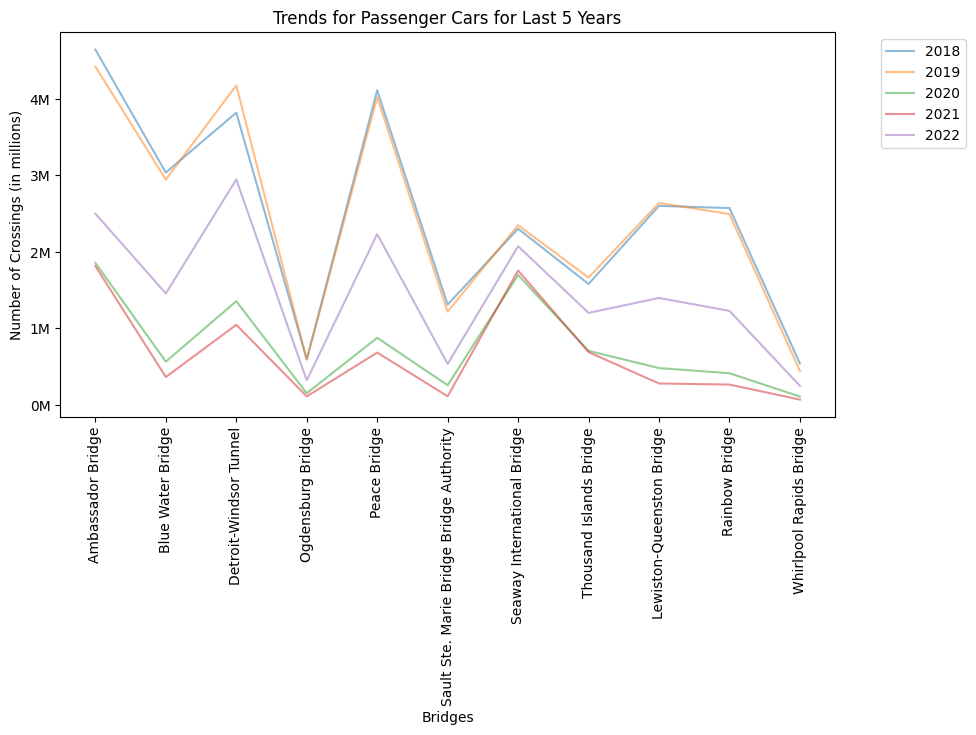

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 1,000,000 to convert to millions
    y_vals = Annual_PassengersCars[year]/1000000
    
    # create a line plot for the current year
    ax.plot(Annual_PassengersCars['Crossings'], y_vals, label=str(year), alpha=0.5)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}M'.format(y) for y in ax.get_yticks()])

# set the  label
ax.set_xlabel('Bridges')

ax.set_ylabel('Number of Crossings (in millions)')

ax.set_title('Trends for Passenger Cars for Last 5 Years')

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()



This line plot is showing the trends for passenger cars crossing the bridges for the last five years (2018-2022). Each line represents a year, and the x-axis shows the bridges. The y-axis shows the number of crossings in millions. The legend displays the year of each line.
The graph indicates that the number of passenger cars crossing the bridges has been relatively consistent over the last five years, with slight fluctuations from year to year. The Ambassador Bridge has the highest number of passenger car crossings, followed by the Peace Bridge and the Detroit-Windsor Tunnel. The other bridges have relatively lower passenger car traffic.

### For Trucks

In [25]:
Annual_Trucks = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name='Annual',header=26)

In [26]:
Annual_Trucks = Annual_Trucks.dropna(axis=0,how='all')
Annual_Trucks = Annual_Trucks.dropna(axis=1,how='all')
Annual_Trucks.head()

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,3498127,3398745.0,2885047.0,2294441.0,2683047.0,2614988.0,2506660.0,2351069.0,2470199.0,2462705.0,2546977.0,2547653.0,2593503.0,2551517.0,2254294.0,2303720.0,2302992.0,203561
2,Blue Water Bridge,NaN,1636520,1613997.0,1574428.0,1344182.0,1429965.0,1448957.0,1477021.0,1536951.0,1586161.0,1603410.0,1680238.0,1648520.0,1654306.0,1596580.0,1440245.0,1658391.0,1728293.0,129568
3,Detroit-Windsor Tunnel,NaN,127433,111082.0,90241.0,57503.0,56457.0,43590.0,35821.0,30097.0,30441.0,29298.0,34377.0,39320.0,20211.0,11146.0,12264.0,20902.0,21257.0,1597
4,Ogdensburg Bridge,NaN,95922,87233.0,76178.0,71504.0,69723.0,72279.0,70562.0,72150.0,76076.0,75787.0,76181.0,85161.0,80584.0,74529.0,69218.0,73415.0,68796.0,5648
5,Peace Bridge,NaN,1301350,1310197.0,1283829.0,1117312.0,1221197.0,1253058.0,1265351.0,1244738.0,1250405.0,1228876.0,1212268.0,1163962.0,1136686.0,1073541.0,1018388.0,1111136.0,999191.0,86124


In [27]:
Annual_Trucks = Annual_Trucks.iloc[:11, 0:24]
Annual_Trucks

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,3498127,3398745.0,2885047.0,2294441.0,2683047.0,2614988.0,2506660.0,2351069.0,2470199.0,2462705.0,2546977.0,2547653.0,2593503.0,2551517.0,2254294.0,2303720.0,2302992.0,203561
2,Blue Water Bridge,NaN,1636520,1613997.0,1574428.0,1344182.0,1429965.0,1448957.0,1477021.0,1536951.0,1586161.0,1603410.0,1680238.0,1648520.0,1654306.0,1596580.0,1440245.0,1658391.0,1728293.0,129568
3,Detroit-Windsor Tunnel,NaN,127433,111082.0,90241.0,57503.0,56457.0,43590.0,35821.0,30097.0,30441.0,29298.0,34377.0,39320.0,20211.0,11146.0,12264.0,20902.0,21257.0,1597
4,Ogdensburg Bridge,NaN,95922,87233.0,76178.0,71504.0,69723.0,72279.0,70562.0,72150.0,76076.0,75787.0,76181.0,85161.0,80584.0,74529.0,69218.0,73415.0,68796.0,5648
5,Peace Bridge,NaN,1301350,1310197.0,1283829.0,1117312.0,1221197.0,1253058.0,1265351.0,1244738.0,1250405.0,1228876.0,1212268.0,1163962.0,1136686.0,1073541.0,1018388.0,1111136.0,999191.0,86124
6,Sault Ste. Marie Bridge Bridge Authority,NaN,122804,111335.0,115435.0,96377.0,99551.0,95900.0,96545.0,95548.0,95844.0,88471.0,89160.0,90645.0,91988.0,88909.0,79475.0,77764.0,66897.0,5642
7,Seaway International Bridge,NaN,111015,109386.0,99295.0,62030.0,74271.0,79492.0,79207.0,76513.0,65991.0,65791.0,67829.0,71153.0,75348.0,69072.0,57935.0,59746.0,62378.0,4299
8,Thousand Islands Bridge,NaN,433119,413432.0,395809.0,348763.0,359934.0,351639.0,355298.0,369759.0,383094.0,399931.0,398072.0,393980.0,389096.0,382678.0,360424.0,392564.0,390392.0,30562
9,Lewiston-Queenston Bridge,NaN,941520,893586.0,789894.0,674912.0,679666.0,699278.0,689178.0,680688.0,720588.0,723744.0,753742.0,789904.0,780952.0,789404.0,728160.0,780498.0,780650.0,61892
10,Rainbow Bridge,NaN,121,143.0,174.0,76.0,122.0,130.0,133.0,124.0,186.0,439.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0


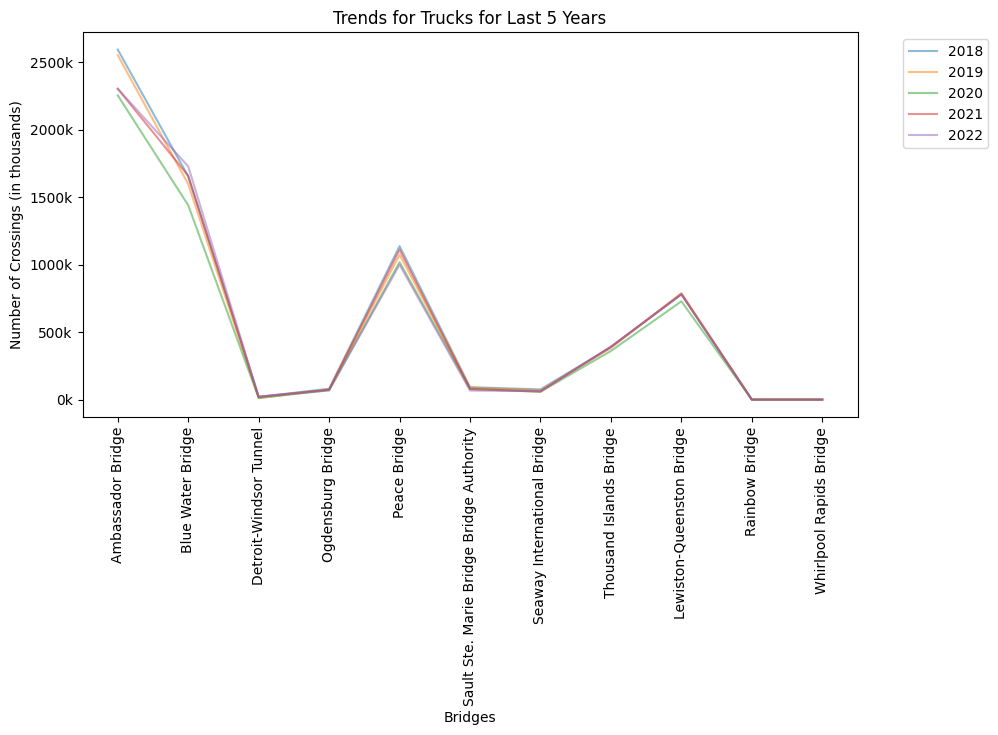

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 1,000 to convert to thousands
    y_vals = Annual_Trucks[year]/1000
    
    # create a line plot for the current year
    ax.plot(Annual_Trucks['Crossings'], y_vals, label=str(year), alpha=0.5)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as thousands
ax.set_yticklabels(['{:.0f}k'.format(y) for y in ax.get_yticks()])

# set the  label
ax.set_xlabel('Bridges')

ax.set_ylabel('Number of Crossings (in thousands)')

ax.set_title('Trends for Trucks for Last 5 Years')

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()


This line plot is showing the trends for Trucks crossing the bridges for the last five years (2018-2022). Each line represents a year, and the x-axis shows the bridges. The y-axis shows the number of crossings in thousands. The legend displays the year of each line. 

The graph indicates that the number of trucks crossing the bridges has been relatively consistent for all the five years, with slight fluctuations from year to year. The Ambassador Bridge has the highest number of Trucks crossings, followed by the Peace Bridge and the Lewiston-Queenston Bridge. The other bridges have relatively low Truck movement.

From this we can tell that the officers for checking the trucks can be increased in these locations and can be decreased for the low movement locations.

# For Buses and Misc Vehicles

In [29]:
Annual_BusesMisc = pd.read_excel('/content/drive/MyDrive/BTOA Traffic 2023.xlsx',sheet_name='Annual',header=44)

In [30]:
Annual_BusesMisc = Annual_BusesMisc.dropna(axis=0,how='all')
Annual_BusesMisc = Annual_BusesMisc.dropna(axis=1,how='all')
Annual_BusesMisc

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,68991,34071.0,16465.0,12611.0,12641.0,12129.0,3151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Blue Water Bridge,NaN,8703,8655.0,7882.0,6307.0,6815.0,6366.0,7127.0,6710.0,6871.0,6179.0,5385.0,5042.0,5292.0,5002.0,1041.0,620.0,1156.0,109
3,Detroit-Windsor Tunnel,NaN,59772,54362.0,55751.0,53128.0,50708.0,49544.0,48678.0,43510.0,42531.0,44483.0,44502.0,41563.0,30754.0,31478.0,6462.0,637.0,1668.0,930
4,Ogdensburg Bridge,NaN,518,570.0,484.0,408.0,364.0,265.0,198.0,262.0,363.0,271.0,265.0,267.0,348.0,257.0,47.0,7.0,114.0,5
5,Peace Bridge,NaN,31040,31912.0,32178.0,28142.0,28274.0,31876.0,30244.0,29514.0,27240.0,25436.0,24158.0,23572.0,21380.0,20700.0,3840.0,554.0,80732.0,720
6,Sault Ste. Marie Bridge Bridge Authority,NaN,57210,52460.0,45002.0,42623.0,49063.0,45839.0,45202.0,45194.0,42580.0,44236.0,49063.0,51925.0,53108.0,46282.0,5192.0,6506.0,23738.0,764
7,Seaway International Bridge,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,Thousand Islands Bridge,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,Lewiston-Queenston Bridge,NaN,11718,9718.0,7524.0,5276.0,5102.0,6892.0,7926.0,7658.0,8332.0,7916.0,7416.0,7090.0,7276.0,6546.0,800.0,806.0,2824.0,158
10,Rainbow Bridge,NaN,37634,33328.0,31292.0,23682.0,27450.0,27578.0,27892.0,25302.0,23968.0,20827.0,21388.0,21176.0,20664.0,20294.0,1044.0,174.0,5712.0,164


In [31]:
Annual_BusesMisc = Annual_BusesMisc.iloc[:11, 0:24]
Annual_BusesMisc

,Crossings,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023 (YTD)
1,Ambassador Bridge,NaN,68991,34071.0,16465.0,12611.0,12641.0,12129.0,3151.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Blue Water Bridge,NaN,8703,8655.0,7882.0,6307.0,6815.0,6366.0,7127.0,6710.0,6871.0,6179.0,5385.0,5042.0,5292.0,5002.0,1041.0,620.0,1156.0,109
3,Detroit-Windsor Tunnel,NaN,59772,54362.0,55751.0,53128.0,50708.0,49544.0,48678.0,43510.0,42531.0,44483.0,44502.0,41563.0,30754.0,31478.0,6462.0,637.0,1668.0,930
4,Ogdensburg Bridge,NaN,518,570.0,484.0,408.0,364.0,265.0,198.0,262.0,363.0,271.0,265.0,267.0,348.0,257.0,47.0,7.0,114.0,5
5,Peace Bridge,NaN,31040,31912.0,32178.0,28142.0,28274.0,31876.0,30244.0,29514.0,27240.0,25436.0,24158.0,23572.0,21380.0,20700.0,3840.0,554.0,80732.0,720
6,Sault Ste. Marie Bridge Bridge Authority,NaN,57210,52460.0,45002.0,42623.0,49063.0,45839.0,45202.0,45194.0,42580.0,44236.0,49063.0,51925.0,53108.0,46282.0,5192.0,6506.0,23738.0,764
7,Seaway International Bridge,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,Thousand Islands Bridge,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,Lewiston-Queenston Bridge,NaN,11718,9718.0,7524.0,5276.0,5102.0,6892.0,7926.0,7658.0,8332.0,7916.0,7416.0,7090.0,7276.0,6546.0,800.0,806.0,2824.0,158
10,Rainbow Bridge,NaN,37634,33328.0,31292.0,23682.0,27450.0,27578.0,27892.0,25302.0,23968.0,20827.0,21388.0,21176.0,20664.0,20294.0,1044.0,174.0,5712.0,164


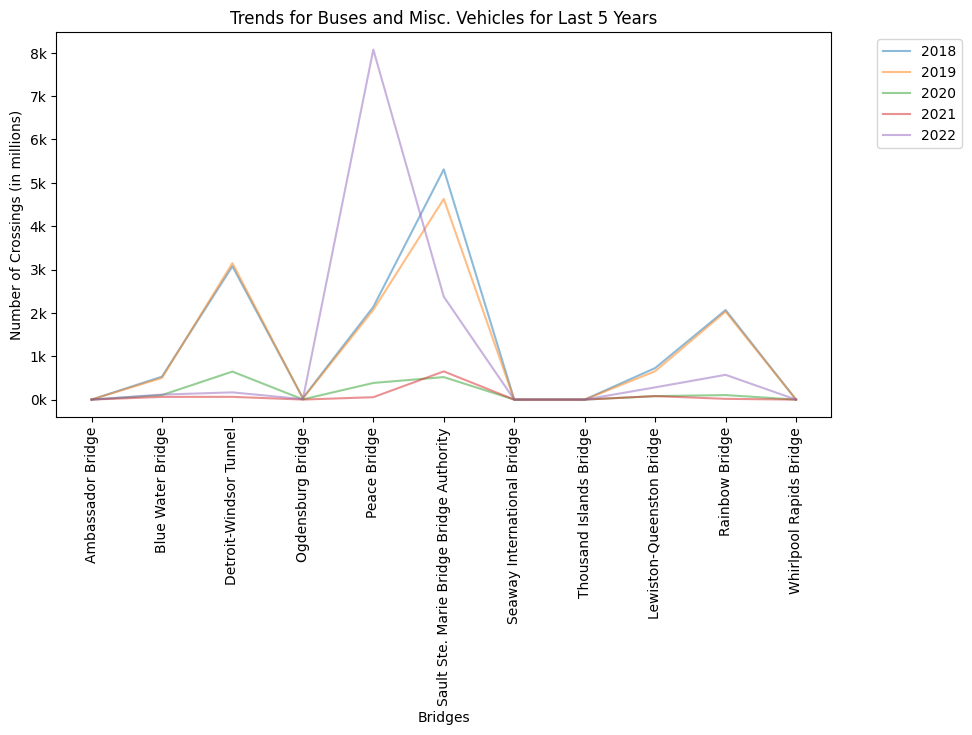

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each year
for year in range(2018, 2023):
    # divide y-axis values by 10,000 to convert to millions
    y_vals = Annual_BusesMisc[year]/10000
    
    # create a line plot for the current year
    ax.plot(Annual_Trucks['Crossings'], y_vals, label=str(year), alpha=0.5)
    
# rotate x-tick labels
plt.xticks(rotation=90)

# format y-tick labels as millions
ax.set_yticklabels(['{:.0f}k'.format(k) for k in ax.get_yticks()])

# set the label
ax.set_xlabel('Bridges')

ax.set_ylabel('Number of Crossings (in millions)')

ax.set_title('Trends for Buses and Misc. Vehicles for Last 5 Years')

# add a legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()



The graph shows the trends for buses and miscellaneous vehicles for the last 5 years, from 2018 to 2022. Each line in the plot represents a particular year, and the x-axis shows the bridges while the y-axis shows the number of crossings in thousands. The plot shows a slight increase in the number of crossings for buses and miscellaneous vehicles over the years, with some fluctuations.

Overall, this graph shows a moderate increase in the number of crossings for buses and miscellaneous vehicles over the last 5 years. However, the increase is not as significant as that for passenger cars and Trucks. 

This could be due to factors such as the availability of public transport options which may have decreased as people are buying a lot of personal vehicles and changes in travel patterns of people.

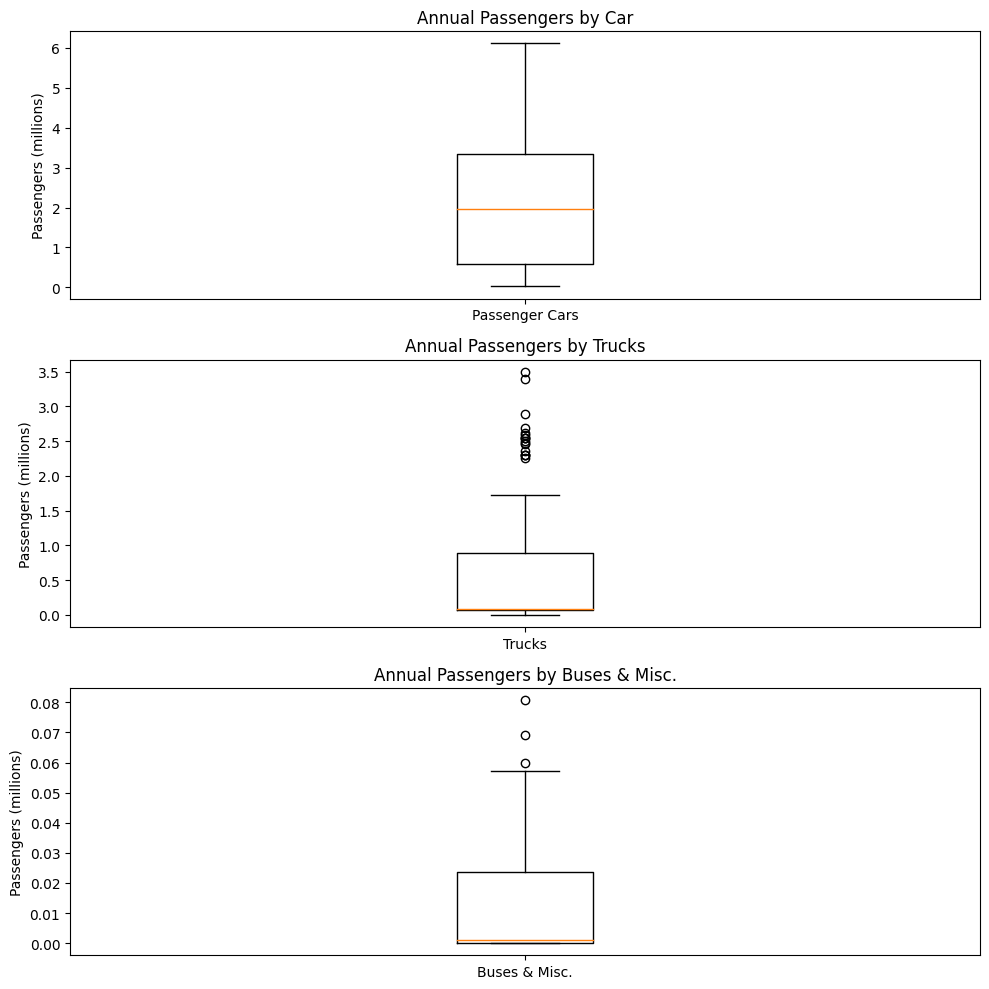

In [33]:
# create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# plot boxplots for each variable
axs[0].boxplot(Annual_PassengersCars.iloc[:, 1:].values.T.flatten() / 1e6, labels=['Passenger Cars'])
axs[0].set_ylabel('Passengers (millions)')
axs[0].set_title('Annual Passengers by Car')

axs[1].boxplot(Annual_Trucks.iloc[:, 1:].values.T.flatten() / 1e6, labels=['Trucks'])
axs[1].set_ylabel('Passengers (millions)')
axs[1].set_title('Annual Passengers by Trucks')

axs[2].boxplot(Annual_BusesMisc.iloc[:, 1:].values.T.flatten() / 1e6, labels=['Buses & Misc.'])
axs[2].set_ylabel('Passengers (millions)')
axs[2].set_title('Annual Passengers by Buses & Misc.')

plt.tight_layout()
plt.show()


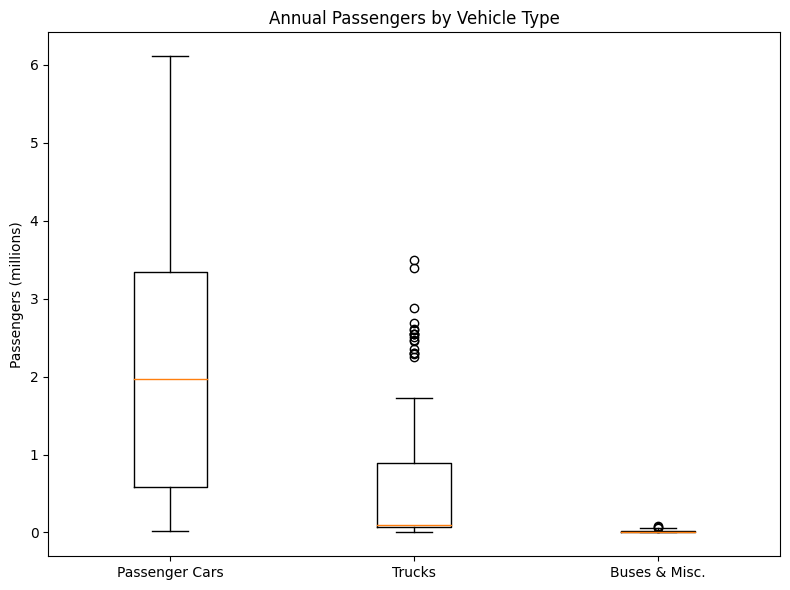

In [34]:
# create a figure and subplots
fig, axs = plt.subplots(figsize=(8, 6))

# combine the data into a single array
data = [    Annual_PassengersCars.iloc[:, 1:].values.T.flatten() / 1e6,
    Annual_Trucks.iloc[:, 1:].values.T.flatten() / 1e6,
    Annual_BusesMisc.iloc[:, 1:].values.T.flatten() / 1e6
]

# plot the boxplot
axs.boxplot(data, labels=['Passenger Cars', 'Trucks', 'Buses & Misc.'])
axs.set_ylabel('Passengers (millions)')
axs.set_title('Annual Passengers by Vehicle Type')

plt.tight_layout()
plt.show()



Looking at the boxplot, we can see that the median annual passenger count is highest for passenger cars, followed by buses/misc., and then trucks. The passenger car data is relatively more dispersed compared to the truck and bus/misc. data. The truck data has a more symmetrical distribution with no significant outliers, while the bus/misc. data has a few outliers towards the higher end of the scale. Overall, we can infer that passenger cars have the highest usage among the three vehicle types in terms of annual passenger counts.

To improve them we can use the following points:

The higher usage of passenger cars as compared to trucks and buses/misc. suggests that the infrastructure should be designed to cater to the needs of passenger car traffic, and efforts should be made to optimize the flow of passenger car traffic through the bridge or tunnel.
The presence of outliers in the bus/misc. data suggests that there may be certain times or events where the usage of buses and other miscellaneous vehicles increases significantly. Operators can use this insight to anticipate such events and take measures to manage traffic flow during these periods.
By analyzing the data over time, the operators can identify trends and patterns in the traffic, which can help them make informed decisions about infrastructure upgrades or changes to traffic management policies.